# What is the most optimal skill to learn for Data Analysts?

#### Methodology

1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent


In [ ]:
!pip install datasets



In [ ]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
#data cleaning
import ast
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
def into_list(skills):
  if(pd.isna(skills)):
    return []
  else:
    return ast.literal_eval(skills)
df['job_skills']=df['job_skills'].apply(into_list)

In [3]:
job_explode=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].explode('job_skills').copy()

In [4]:
df_da_us=job_explode.dropna(subset='salary_year_avg')
df_da_us=df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_da_us=df_da_us.rename(columns={'count':'skill_count','median':'Median_salary'})


In [12]:
skill_stats=job_explode.groupby('job_skills').agg(skill_count=('job_skills','count'),Median_salary=('salary_year_avg','median')).sort_values('skill_count',ascending=False).head(20)
da_job_count=len(df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')])
skill_stats['skill_percent']=skill_stats['skill_count']/da_job_count*100
skill_percent=5
df_da_skills_high_demand=skill_stats[skill_stats['skill_percent']>skill_percent]
df_da_skills_high_demand

,skill_count,Median_salary,skill_percent
job_skills,,,
sql,34452,91000.00,50.802171
excel,27519,84392.00,40.578919
tableau,19311,92875.00,28.475581
python,18382,97500.00,27.105698
sas,13200,90000.00,19.464433
r,11659,92500.00,17.192108
power bi,11630,90000.00,17.149345
word,7611,81194.75,11.223015
powerpoint,7175,85000.00,10.580099


In [15]:
!pip install adjustText

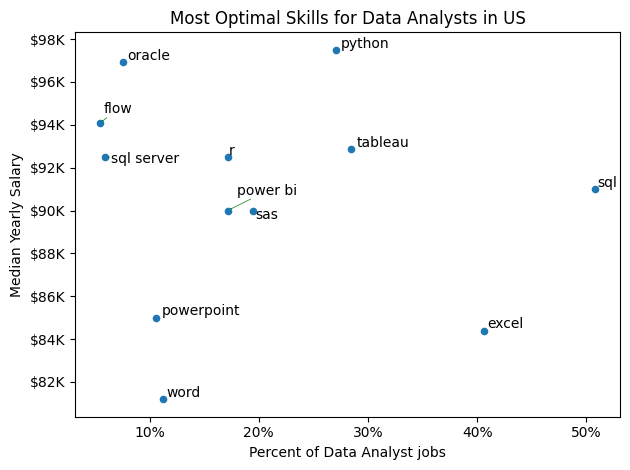

In [21]:
from adjustText import adjust_text
df_da_skills_high_demand.plot(kind='scatter',x='skill_percent',y='Median_salary')
texts=[]
for i,text in enumerate(df_da_skills_high_demand.index):
  texts.append(plt.text(df_da_skills_high_demand['skill_percent'].iloc[i],df_da_skills_high_demand['Median_salary'].iloc[i],text))
adjust_text(texts,arrowprops=dict(arrowstyle='->',color='g',lw=0.5))
 #it adjust skills that are labelled on the graph so that they dont overlap
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))
plt.title('Most Optimal Skills for Data Analysts in US')
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.xlabel('Percent of Data Analyst jobs')
plt.ylabel('Median Yearly Salary')
plt.tight_layout()
plt.show()

## Bonus: Coloring by Technology

We're going to add color labels based on technology.

Removes duplicate entries and any rows with missing values. Then, it combines all dictionary entries into a single dictionary, summing values for keys that repeat across entries. To ensure each key's values are unique, it converts the values to a set and then back to a list. The final result is a dictionary where each key represents a skill and each value is a list of unique attributes associated with that skill.

In [23]:
df_technology=df['job_type_skills'].copy()
df_technology=df_technology.drop_duplicates()
df_technology=df_technology.dropna()

tech_dict={}
for row in df_technology:
  row_dict=ast.literal_eval(row)
  for key, value in row_dict.items():
    if key in tech_dict:
      tech_dict[key]+=value
    else:
      tech_dict[key]=value
for key, value in tech_dict.items():
  tech_dict[key]=list(set(value))

In [24]:
df_technology=pd.DataFrame(list(tech_dict.items()),columns=['technology','skills'])
df_technology=df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,ssrs
0,analyst_tools,nuix
0,analyst_tools,sas
0,analyst_tools,esquisse
0,analyst_tools,spreadsheet
...,...,...
9,sync,slack
9,sync,ringcentral
9,sync,google chat
9,sync,rocketchat


In [28]:
df_plot=df_da_skills_high_demand.merge(df_technology,left_on='job_skills',right_on='skills')

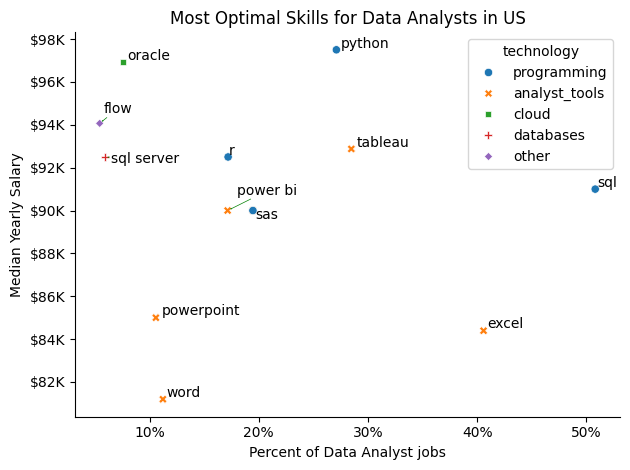

In [30]:
from adjustText import adjust_text
#df_da_skills_high_demand.plot(kind='scatter',x='skill_percent',y='Median_salary')
sns.scatterplot(data=df_plot,x='skill_percent',y='Median_salary',hue='technology',style='technology')
sns.despine()
texts=[]
for i,text in enumerate(df_da_skills_high_demand.index):
  texts.append(plt.text(df_da_skills_high_demand['skill_percent'].iloc[i],df_da_skills_high_demand['Median_salary'].iloc[i],text))
adjust_text(texts,arrowprops=dict(arrowstyle='->',color='g',lw=0.5))
 #it adjust skills that are labelled on the graph so that they dont overlap
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))
plt.title('Most Optimal Skills for Data Analysts in US')
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.xlabel('Percent of Data Analyst jobs')
plt.ylabel('Median Yearly Salary')
plt.tight_layout()
plt.show()